#### Named Entity Recognition

In [6]:

pip install wordcloud

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [92]:
import pandas
book=pd.read_csv("c:/users/mahesh/datasetcsv/Elon_mu.csv",error_bad_lines=False)

In [93]:
book

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [94]:
book=book.drop('Unnamed: 0',axis=1)

In [95]:
book

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [101]:
book = book.rename(columns = { 'Text': 'X'}, inplace = False)

In [102]:
book

,X
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [103]:
book = [X.strip() for X in book.X] # remove both the leading and the trailing characters
book = [X for x in book if X] # removes empty strings, because they are considered in Python as False
book[0:1]

NameError: name 'X' is not defined

In [104]:
book

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It’s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',
 '@fr

In [89]:
# Joining the list into one string/text
text = ' '.join(book)
text

'@kunalb11\tI?m\tan\talien @ID_AA_Carmack\tRay\ttracing\ton\tCyberpunk\twith\tHDR\tis\tnext-level.\tHave\tyou\ttried\tit? @joerogan\t@Spotify\tGreat\tinterview! @gtera27\tDoge\tis\tunderestimated @teslacn\tCongratulations\tTesla\tChina\tfor\tamazing\texecution\tlast\tyear.\tNow\ton\tto\tthe\tnext\tfor\teven\tmore!! Happy\tNew\tYear\tof\tthe\tOx!\thttps://t.co/9WFKMYu2oj Frodo was the underdoge\r\nAll thought he would fail\r\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_\t@flcnhvy\t@anonyx10\tHaha\tthanks\t:) @flcnhvy\t@anonyx10\tIndeed!\tTweets\tdefinitely\tdo\tnot\trepresent\treal-world\ttime\tallocation. The\tmost\tentertaining\toutcome\tis\tthe\tmost\tlikely @GiveDirectly\tJust\tsent\tsome Just\tagree\tto\tdo\tClubhouse\twith\t@kanyewest https://t.co/3rWE9uHSTS @geoffkeighley\t@UnrealEngine\tIt?s\tgetting\treal Bought\tsome\tDogecoin\tfor\tlil\tX\t\tso\the\tcan\tbe\ta\ttoddler\thodler @JoshManMode\tHe\tdefinitely\thas\tissues\t\tbut\tthe\tsentencing\tseems\ta\tbit\thigh 

In [105]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11\tIm\tan\talien IDAACarmack\tRay\ttracing\ton\tCyberpunk\twith\tHDR\tis\tnextlevel\tHave\tyou\ttried\tit joerogan\tSpotify\tGreat\tinterview gtera27\tDoge\tis\tunderestimated teslacn\tCongratulations\tTesla\tChina\tfor\tamazing\texecution\tlast\tyear\tNow\ton\tto\tthe\tnext\tfor\teven\tmore Happy\tNew\tYear\tof\tthe\tOx\thttpstco9WFKMYu2oj Frodo was the underdoge\r\nAll thought he would fail\r\nHimself most of all httpstcozGxJFDzzrM OwenSparks\tflcnhvy\tanonyx10\tHaha\tthanks\t flcnhvy\tanonyx10\tIndeed\tTweets\tdefinitely\tdo\tnot\trepresent\trealworld\ttime\tallocation The\tmost\tentertaining\toutcome\tis\tthe\tmost\tlikely GiveDirectly\tJust\tsent\tsome Just\tagree\tto\tdo\tClubhouse\twith\tkanyewest httpstco3rWE9uHSTS geoffkeighley\tUnrealEngine\tIts\tgetting\treal Bought\tsome\tDogecoin\tfor\tlil\tX\t\tso\the\tcan\tbe\ta\ttoddler\thodler JoshManMode\tHe\tdefinitely\thas\tissues\t\tbut\tthe\tsentencing\tseems\ta\tbit\thigh freewalletorg\tThanks\tfor\tfixing freewalletorg\t

In [110]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'Im', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [112]:
len(text_tokens)

21076

In [113]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahesh\AppData\Roaming\nltk_data...


['kunalb11', 'Im', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


[nltk_data]   Unzipping corpora\stopwords.zip.


In [114]:
#Noramalize the data
lower_words = [X.lower() for X in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [115]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


#!python -m spacy download en

In [116]:
# NLP english language model of spacy library
nlp = spacy.load('en')

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [83]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

OSError: [E941] Can't find model 'en'. It looks like you're trying to load a model from a shortcut, which is obsolete as of spaCy v3.0. To load the model, use its full name instead:

nlp = spacy.load("en_core_web_sm")

For more details on the available models, see the models directory: https://spacy.io/models. If you want to create a blank model, use spacy.blank: nlp = spacy.blank("en")

In [ ]:
one_block

In [6]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like SCONJ
tally PROPN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [7]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'monthAfter', 'will', 'pay', 'can', 'install', 'pirated', 'version', 'install', 'version', 'can', 'use']


In [8]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,can,5
1,will,4
2,office,3
3,want,2
4,battery,2
5,store,2
6,install,2
7,version,2
8,file,2
9,play,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

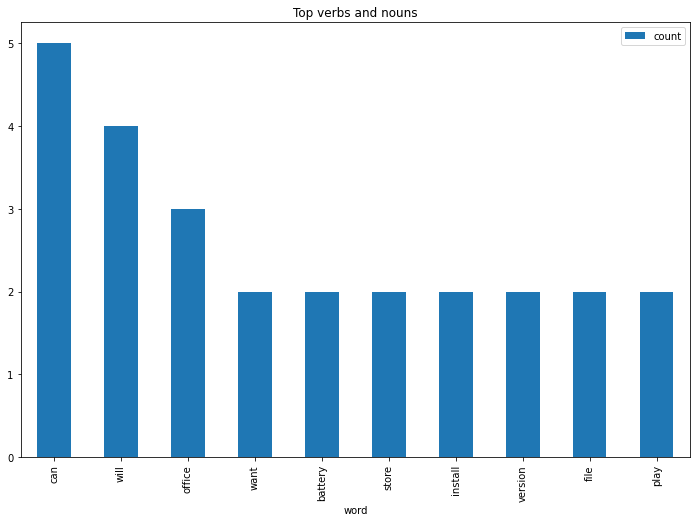

In [9]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [10]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [11]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 6: expected 1 fields, saw 14\n'


In [13]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [14]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [18]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [19]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [21]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [23]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [24]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
128,Display is too good and it feels like butter o...,5,12
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
46,Ships with macOS sierra but update is availabl...,6,86
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
178,MERITS..IT IS BEST IN ITS PERFORMANCE..SOUND Q...,10,43
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [25]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.978610
std        3.420302
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [26]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [27]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [28]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value'>

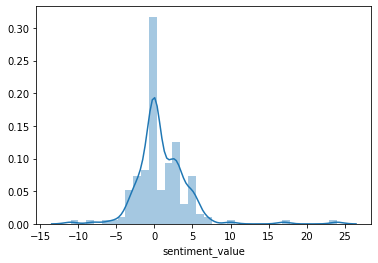

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

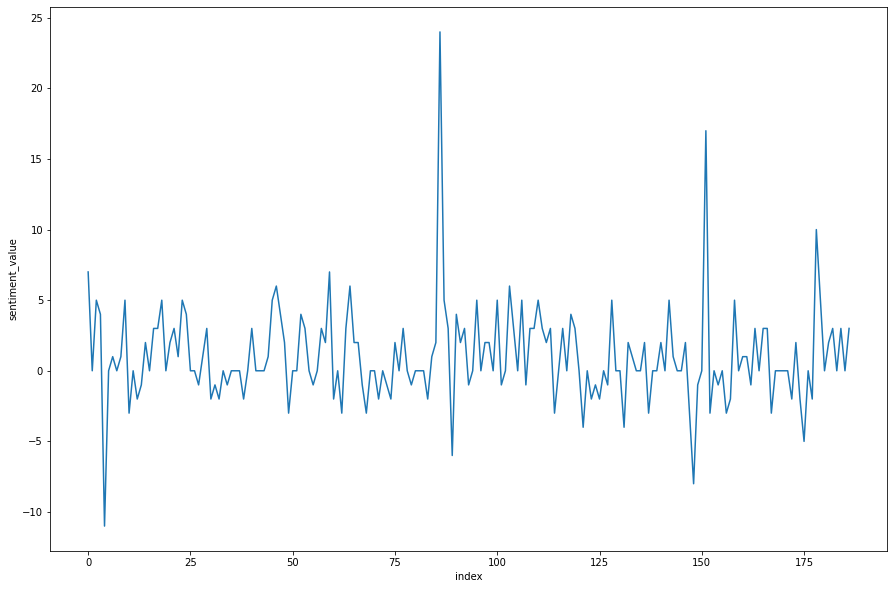

In [30]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

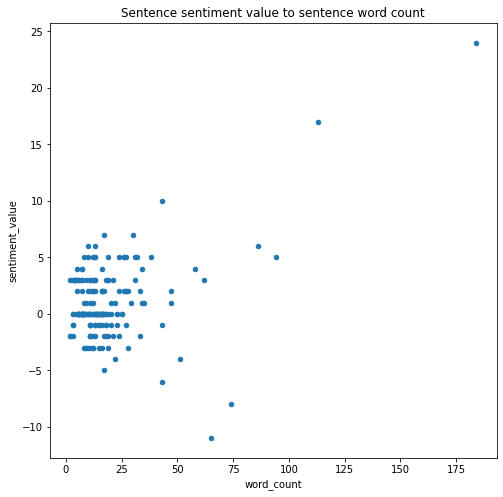

In [31]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')